[1.  0.5 0.  0.  0. ]
[1.  0.5 0.  0.  0. ]
[0.   0.75 1.   1.   1.  ]
[0.   0.75 1.   1.   1.  ]
[1.   0.25 0.   0.   0.  ]
[1.   0.25 0.   0.   0.  ]
[0.01002513 0.1026334  0.58578644 1.36754447 1.8       ]
[0.01002513 0.1026334  0.58578644 1.36754447 1.8       ]
[1.8        1.36754447 0.58578644 0.1026334  0.01002513]
[1.8        1.36754447 0.58578644 0.1026334  0.01002513]
(0.6666666666666667, 0.22222222222222243, 0.5656854249492306, -0.5999999999999694)
(0.6666666666666666, 0.2222222222222222, 0.565685424949238, -0.6000000000000001)
0.49999999999999983
0.5
25.0
shape > -1 does not hold
-20.0
[157.02028761 164.57085428 159.94775925 167.79432615 176.53810831
 184.38501482 196.65939559 208.87393794 196.46349042 214.15978786
 226.04597514 222.3964491  196.66564643 201.40124421 182.42506133
 150.89371561 188.60572169 192.82214716 173.79486679   0.        ]
[102.67224159 103.38590059 117.15182085 118.71394567 120.4573089
 124.37960961 125.27558704 128.1886905  158.00529952 158.16931939


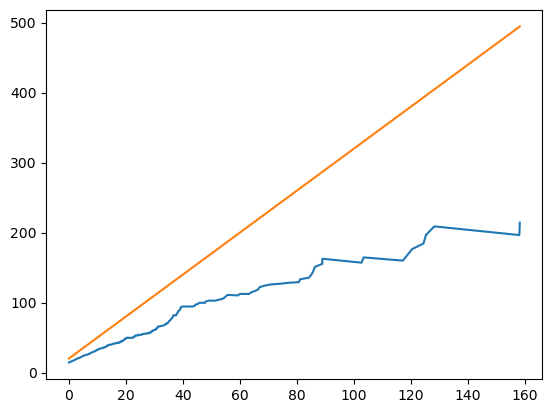

In [1]:
import torch
from pyasn1_modules.rfc2985 import pkcs_9_oc
from statsmodels.sandbox.distributions.genpareto import shape

from ultralytics import YOLO
import numpy as np
from ultralytics.nn.tasks import DetectionModel
if __name__ == "__main__":
    # 加载YOLO模型（配置文件或预训练权重）
    MODEL_PATH = r"D:\codes\ultralytics-main\ultralytics\cfg\models\S4A\yolov8-SMALL-4head-SE-CA-ECA.yaml"  # 你的配置文件路径

    model=DetectionModel(MODEL_PATH)
    # model=YOLO(MODEL_PATH)


In [2]:
print(model.model[0])

Conv(
  (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  (act): SiLU(inplace=True)
)


In [3]:
print(len(model.model))

20


In [4]:
in_=torch.randn(1,3,640,640)
out=model.model[0](in_)
print(in_.shape,out.shape)

torch.Size([1, 3, 640, 640]) torch.Size([1, 32, 320, 320])


In [5]:
in_=torch.randn(1,3,640,640)
i=0
p_list=[in_]
for i in range(10):
    layer=model.model[i]
    print(f"{i}_________________________________________")
    print(f"in_shape:::{in_.shape}")
    out=layer(in_)
    print(layer)
    print(f"out_shape:::{out.shape}")
    in_=out
    p_list.append(out)
    print("##############################################")
    if i==4:
        p4_out=out
    if i==2:
        p2_out=out

0_________________________________________
in_shape:::torch.Size([1, 3, 640, 640])
Conv(
  (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  (act): SiLU(inplace=True)
)
out_shape:::torch.Size([1, 32, 320, 320])
##############################################
1_________________________________________
in_shape:::torch.Size([1, 32, 320, 320])
Conv(
  (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
  (act): SiLU(inplace=True)
)
out_shape:::torch.Size([1, 64, 160, 160])
##############################################
2_________________________________________
in_shape:::torch.Size([1, 64, 160, 160])
C2f_SE(
  (cv1): Conv(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.0

In [6]:
p4_out.shape

torch.Size([1, 128, 80, 80])

In [7]:
p10=model.model[10]
print(p10)
print(p_list[-1].shape)
out=p10(p_list[-1])
p_list.append(out)
print(out.shape)



Upsample(scale_factor=2.0, mode='nearest')
torch.Size([1, 512, 20, 20])
torch.Size([1, 512, 40, 40])


In [8]:
p11=model.model[11]
print(p11)
print(p_list[-1].shape,print(p_list[6].shape))
out=p11([p_list[-1],p_list[6]])
p_list.append(out)
print(out.shape)

Concat()
torch.Size([1, 256, 40, 40])
torch.Size([1, 512, 40, 40]) None
torch.Size([1, 768, 40, 40])


In [9]:
p12=model.model[12]
print(p12)
print(p_list[-1].shape)
out=p12(p_list[-1])
p_list.append(out)
print(out.shape)

C2f(
  (cv1): Conv(
    (conv): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(640, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (m): ModuleList(
    (0-2): 3 x Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    )
  )

In [10]:
p13=model.model[13]
print(p13)
print("in_shape:",p_list[-1].shape)
out=p13(p_list[-1])
p_list.append(out)
print("out_shape",out.shape)

Upsample(scale_factor=2.0, mode='nearest')
in_shape: torch.Size([1, 256, 40, 40])
out_shape torch.Size([1, 256, 80, 80])


In [11]:
p14=model.model[14]
print(p14)
print("in_shape:",p_list[-1].shape,p4_out.shape)
out=p14([p_list[-1],p4_out])
p_list.append(out)
print("out_shape",out.shape)


Concat()
in_shape: torch.Size([1, 256, 80, 80]) torch.Size([1, 128, 80, 80])
out_shape torch.Size([1, 384, 80, 80])


In [12]:
p15=model.model[15]
print(p15)
print("in_shape:",p_list[-1].shape)
out=p15(p_list[-1])
p_list.append(out)
print("out_shape",out.shape)


C2f(
  (cv1): Conv(
    (conv): Conv2d(384, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(480, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (m): ModuleList(
    (0-2): 3 x Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    )
  )
)
in_

In [13]:
p16=model.model[16]
print(p16)
print("in_shape:",p_list[-1].shape)
out=p16(p_list[-1])
p_list.append(out)
print("out_shape",out.shape)


Upsample(scale_factor=2.0, mode='nearest')
in_shape: torch.Size([1, 192, 80, 80])
out_shape torch.Size([1, 192, 160, 160])


In [14]:
p17=model.model[17]
print(p17)
print("in_shape:",p_list[-1].shape,p2_out.shape)
out=p17([p_list[-1],p2_out])
p_list.append(out)
print("out_shape",out.shape)

Concat()
in_shape: torch.Size([1, 192, 160, 160]) torch.Size([1, 64, 160, 160])
out_shape torch.Size([1, 256, 160, 160])


In [15]:
p18=model.model[18]
print(p18)
print("in_shape:",p_list[-1].shape)
out=p18(p_list[-1])
p_list.append(out)
print("out_shape",out.shape)

C2f(
  (cv1): Conv(
    (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(320, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (m): ModuleList(
    (0-2): 3 x Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    )
  )
)
in_

In [17]:
for p in p_list:
    print(p.shape)

torch.Size([1, 3, 640, 640])
torch.Size([1, 32, 320, 320])
torch.Size([1, 64, 160, 160])
torch.Size([1, 64, 160, 160])
torch.Size([1, 128, 80, 80])
torch.Size([1, 128, 80, 80])
torch.Size([1, 256, 40, 40])
torch.Size([1, 256, 40, 40])
torch.Size([1, 512, 20, 20])
torch.Size([1, 512, 20, 20])
torch.Size([1, 512, 20, 20])
torch.Size([1, 512, 40, 40])
torch.Size([1, 768, 40, 40])
torch.Size([1, 256, 40, 40])
torch.Size([1, 256, 80, 80])
torch.Size([1, 384, 80, 80])
torch.Size([1, 192, 80, 80])
torch.Size([1, 192, 160, 160])
torch.Size([1, 256, 160, 160])
torch.Size([1, 128, 160, 160])


In [18]:
p18_out=p_list[19]
p15_out=p_list[16]
p12_out=p_list[13]
p9_out=p_list[10]
print(p18_out.shape)
print(p15_out.shape)
print(p12_out.shape)
print(p9_out.shape)


torch.Size([1, 128, 160, 160])
torch.Size([1, 192, 80, 80])
torch.Size([1, 256, 40, 40])
torch.Size([1, 512, 20, 20])


In [19]:
detect=model.model[19]
print(detect)
print("in_shape:",p18_out.shape,p15_out.shape,p12_out.shape,p9_out.shape)
out=detect([p18_out,p15_out,p12_out,p9_out])


Detect(
  (cv2): ModuleList(
    (0): Sequential(
      (0): Conv(
        (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): Sequential(
      (0): Conv(
        (conv): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     

In [24]:
len(detect.cv2)
print(detect.cv2)

ModuleList(
  (0): Sequential(
    (0): Conv(
      (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Sequential(
    (0): Conv(
      (conv): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=Tru

In [27]:
print(len(detect.cv3))
detect.cv3

4


ModuleList(
  (0): Sequential(
    (0): Conv(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): Conv2d(128, 10, kernel_size=(1, 1), stride=(1, 1))
  )
  (1): Sequential(
    (0): Conv(
      (conv): Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03,

In [19]:
print(out.shape)


AttributeError: 'list' object has no attribute 'shape'

In [20]:
input_tensor=torch.Tensor(4,3,640,640)
output_tensor=model(input_tensor)
print(output_tensor.shape)

AttributeError: 'list' object has no attribute 'shape'

In [31]:
from PIL import Image
img=Image.open(r"C:\Users\gaoge\Desktop\小目标识别\ultralytics-main (副本)\datasets\VisDrone_yolov8n\VisDrone2019-DET-val\images\0000001_02999_d_0000005.jpg")
model=YOLO(r"C:\Users\gaoge\Desktop\小目标识别\yolov8-SMALL-4head-SE-CA-ECA_63mAP\yolov8-SMALL-4head-SE-CA-ECA_63mAP\coco\weights\best.pt")
out=model(img,conf=0.25)
out[0].show()



0: 384x640 5 persons, 10 cars, 1 bus, 1 traffic light, 1 fire hydrant, 1 bench, 1 umbrella, 67.9ms
Speed: 2.1ms preprocess, 67.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


In [32]:
detect_model=DetectionModel(MODEL_PATH)
yolo_model=YOLO(MODEL_PATH)


WARNING no model scale passed. Assuming scale='l'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  2     49920  ultralytics.nn.modules.block.C2f_SE          [64, 64, 2, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  3    284872  ultralytics.nn.modules.block.C2f_CA          [128, 128, 3, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3   1116681  ultralytics.nn.modules.block.C2f_ECA         [256, 256, 3, True]           
  7                  -1  1   1180672

In [33]:
yolo_model.model==detect_model.model

False